In [1]:
# moon dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='random',
                                                  max_leaf_nodes=16),
                           n_estimators=500,
                           max_samples=1.0,
                           bootstrap=True,
                           n_jobs=-1)

### 변수 중요도

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10385925071760302
sepal width (cm) 0.024324633731333842
petal length (cm) 0.4384773074011964
petal width (cm) 0.43333880814986675


###  MNIST데이터셋

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'],test_size = 0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [13]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(max_features='auto', n_estimators=500, n_jobs=-1)

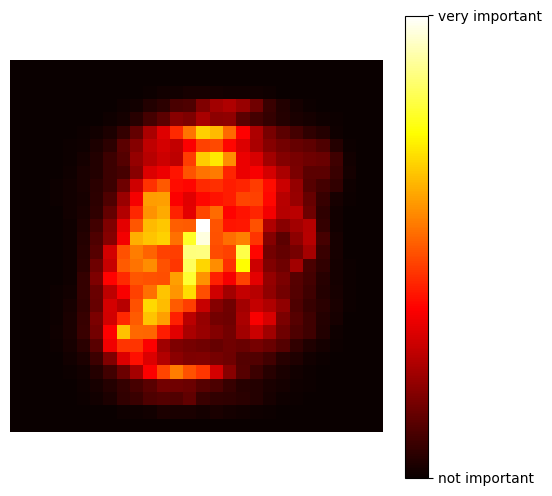

In [14]:
scores = rnd_clf.feature_importances_.reshape(28,28)
plt.figure(figsize=(6,6))
plt.imshow(scores, cmap = matplotlib.cm.hot,
          interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[scores.min(),
                          scores.max()])
cbar.ax.set_yticklabels(['not important', 'very important'])
plt.show()